# Dự án 2: Dự đoán Giá nhà (Ames Housing)

## Bước 1: Tải và Khám phá Dữ liệu (EDA)
Tải dữ liệu và thực hiện các bước "khám bệnh" cơ bản để hiểu cấu trúc và các vấn đề của dữ liệu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt để các biểu đồ hiển thị ngay trong notebook
%matplotlib inline

In [2]:
try:
    df = pd.read_csv('train.csv')
    print("Tải file train.csv thành công!")
    display(df.head())

except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'train.csv'.")
    print("Lưu ý: Bạn cũng cần file 'data_description.txt' để tham khảo.")

Tải file train.csv thành công!


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Phân tích 1: Cấu trúc Dữ liệu & Kiểu Dữ liệu
Chạy `.info()` để kiểm tra tổng quan, kiểu dữ liệu (Dtype) của mỗi cột, và phát hiện các cột có giá trị rỗng (non-null count < tổng số hàng).

In [3]:
# Kiểm tra tổng quan: kiểu dữ liệu và các giá trị không rỗng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Bộ dữ liệu có 1460 hàng và 81 cột (bao gồm `Id` và cột mục tiêu `SalePrice`).
* Dữ liệu là một sự kết hợp của `int64`, `float64`, và `object` (chuỗi). Các cột `object` sẽ cần được mã hóa.
* Nhiều cột có số lượng "Non-Null" ít hơn 1460, cho thấy dữ liệu thiếu là một vấn đề lớn cần xử lý.

### Phân tích 2: Tổng quan Thống kê
Sử dụng `.describe()` để xem xét phân phối của các cột SỐ. Chúng ta cần chú ý đến `mean` vs `median (50%)` để xem độ lệch, và `75%` vs `max` để phát hiện dấu hiệu của outliers.

In [4]:
# Xem các thống kê cơ bản cho các cột số
display(df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* **Thang đo:** Các cột có thang đo rất khác nhau. `LotArea` có giá trị max là 215245 trong khi `OverallQual` chỉ có max là 10. Điều này xác nhận việc chuẩn hóa (scaling) sẽ là bắt buộc.
* **Dấu hiệu Lệch:** Nhìn vào cột `SalePrice`, giá trị trung bình `mean` (khoảng 180k) lớn hơn đáng kể so với trung vị `50%` (khoảng 163k). Đây là dấu hiệu rõ ràng của phân phối lệch phải (right-skewed).

### Phân tích 3: Xác nhận Dữ liệu thiếu
Lệnh `.info()` cho thấy có dữ liệu thiếu, giờ chúng ta sẽ đếm chính xác số lượng giá trị rỗng trên mỗi cột và sắp xếp chúng.

In [5]:
# Đếm chính xác số lượng giá trị rỗng (NaN) trên mỗi cột
print("Các cột có giá trị thiếu:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

Các cột có giá trị thiếu:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


* Có 4 cột (`PoolQC`, `MiscFeature`, `Alley`, `Fence`) bị thiếu dữ liệu cực kỳ nghiêm trọng (hơn 80%).
* **Insight quan trọng:** Khi tham chiếu đến file `data_description.txt`, chúng ta phát hiện ra rằng `NA` ở các cột này không có nghĩa là "thiếu", mà có ý nghĩa là **"Không có"** (ví dụ: `PoolQC = NA` có nghĩa là "Không có Hồ bơi"). Đây là một vấn đề về mã hóa dữ liệu, không phải dữ liệu bị mất, và sẽ được xử lý như một đặc trưng hạng mục.
* Các cột khác như `LotFrontage` và `GarageYrBlt` bị thiếu một lượng đáng kể và sẽ cần các chiến lược điền giá trị (imputation).

### Phân tích 4: Phân phối của Biến Mục tiêu (SalePrice)
Bây giờ, hãy xem xét biến quan trọng nhất mà chúng ta cần dự đoán: `SalePrice`. Hình dạng của phân phối này sẽ quyết định xem chúng ta có cần biến đổi nó không.

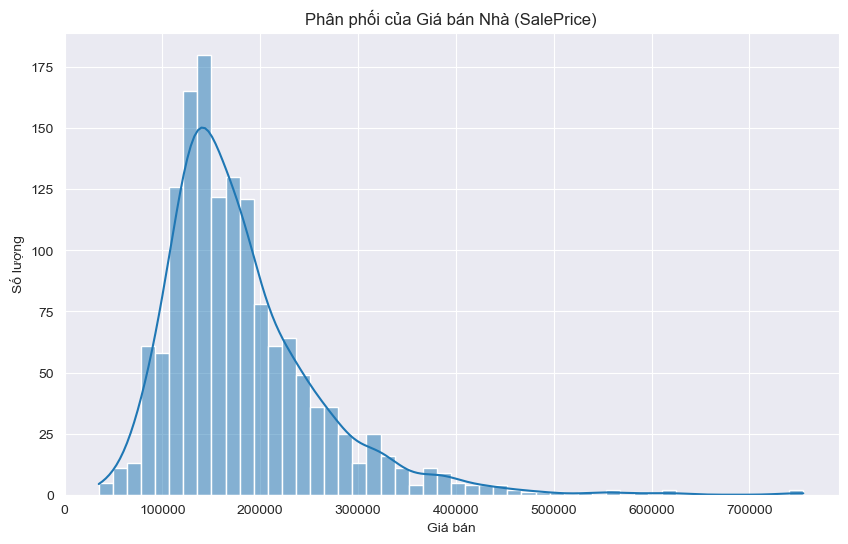

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Phân phối của Giá bán Nhà (SalePrice)')
plt.xlabel('Giá bán')
plt.ylabel('Số lượng')
plt.show()

* **Phát hiện:** Biểu đồ xác nhận: Phân phối bị lệch phải mạnh, với một cái đuôi dài về phía các bất động sản giá cao.
* **Hệ quả:** Nhiều mô hình hồi quy tuyến tính hoạt động tốt nhất trên dữ liệu phân phối chuẩn.
* **Giải pháp (Bước 2):** Chúng ta sẽ phải áp dụng một **biến đổi logarit (Log Transform)** cho cột này ở bước tiền xử lý để chuẩn hóa nó, giúp các mô hình tuyến tính hội tụ tốt hơn.

## Bước 2: Tiền xử lý & Kỹ thuật Đặc trưng

Dựa trên kết quả EDA, chúng ta phải "dọn dẹp" và "biến đổi" dữ liệu trước khi huấn luyện. Bước đầu tiên và quan trọng nhất là xử lý biến mục tiêu `SalePrice` đang bị lệch phải. Các mô hình hồi quy tuyến tính hoạt động tốt nhất khi biến mục tiêu tuân theo phân phối chuẩn. Chúng ta sẽ sử dụng phép **biến đổi Logarit** (Log Transform) để khắc phục điều này.

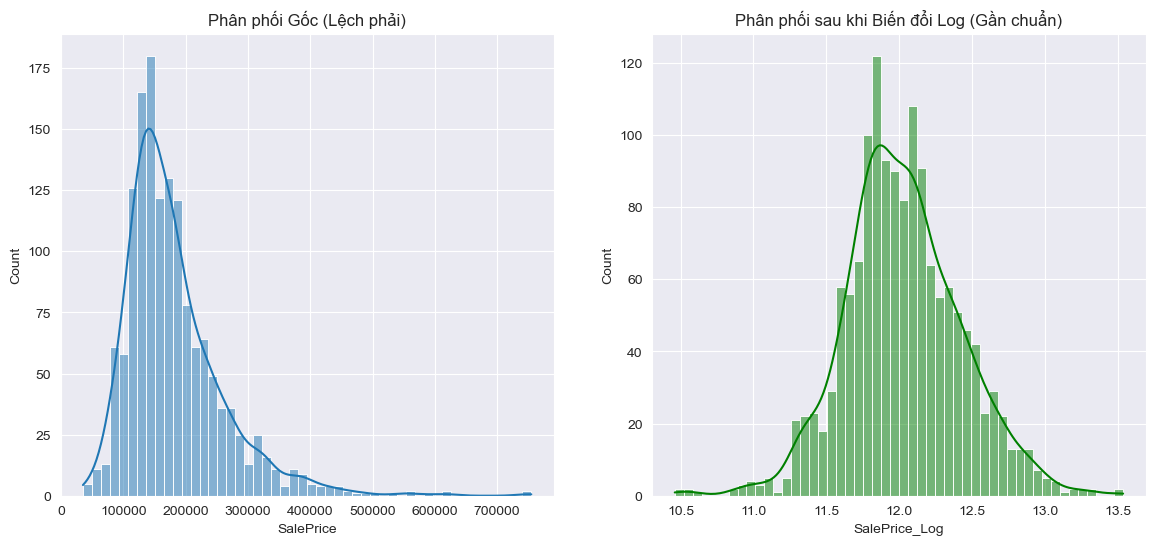

In [7]:
# Áp dụng phép biến đổi Log(1+x) (np.log1p)
# Chúng ta dùng log1p thay vì log(x) để tránh lỗi nếu có giá trị bằng 0
df['SalePrice_Log'] = np.log1p(df['SalePrice'])

# Vẽ biểu đồ so sánh
plt.figure(figsize=(14, 6))

# 1. Biểu đồ gốc (lệch phải)
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Phân phối Gốc (Lệch phải)')

# 2. Biểu đồ sau khi biến đổi Log
plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice_Log'], kde=True, bins=50, color='green')
plt.title('Phân phối sau khi Biến đổi Log (Gần chuẩn)')

plt.show()

* **Phát hiện:** Như biểu đồ bên phải cho thấy, sau khi áp dụng phép biến đổi logarit, cột `SalePrice_Log` mới của chúng ta bây giờ có hình dạng rất giống với một **phân phối chuẩn (hình chuông)**.
* **Hệ quả:** Từ giờ trở đi, chúng ta sẽ huấn luyện tất cả các mô hình hồi quy để dự đoán cột `SalePrice_Log` này. Khi cần đưa ra giá trị dự đoán cuối cùng (bằng tiền), chúng ta chỉ cần thực hiện phép tính ngược lại (lấy hàm mũ, `np.expm1`).

### Tiền xử lý: Xử lý Dữ liệu thiếu (Phần 1: Các giá trị NA có ý nghĩa)

Như đã phát hiện trong EDA, rất nhiều giá trị `NaN` trong các cột hạng mục thực chất có nghĩa là "Không có". Chúng ta phải chuyển đổi các giá trị `NaN` này thành một hạng mục văn bản (ví dụ: chuỗi "None") để mô hình hiểu đúng ý nghĩa của nó.

In [8]:
# Liệt kê các cột mà 'NA' có ý nghĩa "Không có" (dựa trên data_description.txt)
cols_fill_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'MasVnrType', 'MiscFeature', 'PoolQC'
]

# Áp dụng fillna bằng chuỗi "None" cho các cột này
for col in cols_fill_none:
    if col in df.columns:
        df[col] = df[col].fillna('None')

print("Đã điền 'None' cho các cột hạng mục bị thiếu có ý nghĩa.")

Đã điền 'None' cho các cột hạng mục bị thiếu có ý nghĩa.


### Tiền xử lý: Xử lý Dữ liệu thiếu (Phần 2: Giá trị Số)

Chúng ta còn lại một số giá trị số bị thiếu cần được xử lý (impute). Chúng ta sẽ áp dụng các chiến lược hợp lý cho từng cột:

1.  **`LotFrontage` (Diện tích mặt tiền):** Giá trị này có khả năng liên quan đến các ngôi nhà khác trong cùng khu vực. Tuy nhiên, một chiến lược cơ sở (baseline) đơn giản và an toàn là điền bằng **trung vị (median)** của toàn bộ cột.
2.  **`GarageYrBlt` (Năm xây Gara):** Các giá trị `NaN` ở đây tương ứng với các ngôi nhà có `GarageType = 'None'`. Do đó, việc điền giá trị `0` là hợp lý.
3.  **`MasVnrArea` (Diện tích ốp gạch):** Tương tự, `NaN` ở đây rất có thể có nghĩa là "không có", vì vậy chúng ta sẽ điền giá trị `0`.

In [9]:
# 1. Điền 'LotFrontage' bằng Trung vị (Median)
lotfrontage_median = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(lotfrontage_median)

# 2. Điền 'GarageYrBlt' và 'MasVnrArea' bằng 0
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# Kiểm tra lại các giá trị thiếu
print("Số lượng giá trị thiếu còn lại sau khi xử lý các cột số:")
remaining_missing = df.isnull().sum()
print(remaining_missing[remaining_missing > 0])

Số lượng giá trị thiếu còn lại sau khi xử lý các cột số:
Electrical    1
dtype: int64


* **Phát hiện:** Sau khi chạy code trên, chúng ta thấy vẫn còn một vài giá trị thiếu ở các cột như `Electrical`.
* **Giải pháp:** Vì số lượng này là cực kỳ nhỏ so với 1460 hàng dữ liệu, cách đơn giản và an toàn nhất là xóa bỏ hoàn toàn những hàng này.

### Tiền xử lý: Xử lý Dữ liệu thiếu Cuối cùng (Electrical)

Sau khi xử lý các cột số và các cột hạng mục có ý nghĩa "None", chúng ta thấy vẫn còn 1 giá trị thiếu duy nhất ở cột `Electrical`.

Thay vì xóa hàng này (sẽ làm mất dữ liệu), chúng ta sẽ sử dụng chiến lược impute an toàn nhất cho dữ liệu hạng mục: điền bằng giá trị phổ biến nhất (mode).

In [10]:
# Kiểm tra các giá trị thiếu còn lại TRƯỚC BƯỚC NÀY
print("Các giá trị thiếu còn lại TRƯỚC KHI xử lý:")
remaining_missing_before = df.isnull().sum()
print(remaining_missing_before[remaining_missing_before > 0])

# 1. Tìm giá trị phổ biến nhất (mode) của cột 'Electrical'
electrical_mode = df['Electrical'].mode()[0]
print(f"\nMode của cột Electrical là: '{electrical_mode}'")

# 2. Điền giá trị thiếu bằng mode (dùng cách gán lại an toàn)
df['Electrical'] = df['Electrical'].fillna(electrical_mode)

print("\nĐã điền giá trị thiếu cho Electrical.")

# 3. Kiểm tra lần cuối
print(f"\nTổng số giá trị thiếu trong toàn bộ bộ dữ liệu: {df.isnull().sum().sum()}")

# Gán df_cleaned để đồng bộ
df_cleaned = df.copy()

Các giá trị thiếu còn lại TRƯỚC KHI xử lý:
Electrical    1
dtype: int64

Mode của cột Electrical là: 'SBrkr'

Đã điền giá trị thiếu cho Electrical.

Tổng số giá trị thiếu trong toàn bộ bộ dữ liệu: 0


Giờ đây bộ dữ liệu `df_cleaned` của chúng ta đã sạch 100% giá trị thiếu.
- Các cột `NaN` có ý nghĩa đã được gán "None".
- Các cột số thực sự thiếu đã được điền bằng giá trị hợp lý (median/0).
- Cột hạng mục cuối cùng (`Electrical`) đã được điền bằng mode.

Chúng ta đã sẵn sàng cho bước cuối cùng của tiền xử lý: Mã hóa và Chuẩn hóa toàn bộ đặc trưng.

### Tiền xử lý: Mã hóa và Chuẩn hóa Toàn bộ Đặc trưng

Bộ dữ liệu `df_cleaned` hiện đã sạch giá trị thiếu. Tuy nhiên, các mô hình vẫn chưa thể xử lý các cột `object` (dạng chuỗi).

Bước tiếp theo là áp dụng một quy trình tiền xử lý thống nhất để:
1.  **Chuẩn hóa (Standardize)** tất cả các cột số.
2.  **Mã hóa One-Hot (One-Hot Encode)** tất cả các cột hạng mục.

Chúng ta sẽ sử dụng `ColumnTransformer` để áp dụng các phép biến đổi khác nhau lên các nhóm cột khác nhau một cách hiệu quả.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Tách X và y từ bộ dữ liệu đã sạch hoàn toàn
# Chúng ta sẽ dùng biến mục tiêu đã biến đổi log ('SalePrice_Log')
y_target = df_cleaned['SalePrice_Log']
X_features = df_cleaned.drop(['Id', 'SalePrice', 'SalePrice_Log'], axis=1) # Bỏ ID và cả 2 cột giá

# 2. Chia Train-Test Split LẦN CUỐI CÙNG
# Từ giờ, chúng ta sẽ chỉ dùng 4 biến này
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

print(f"Kích thước X_train ban đầu: {X_train.shape}")

# 3. Định nghĩa các nhóm cột
# Lấy tất cả các cột có kiểu 'object' hoặc 'category'
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Lấy tất cả các cột còn lại (là cột số)
numeric_features = X_train.select_dtypes(include=np.number).columns

# 4. Tạo bộ tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        # Tên, Transformer, Các cột áp dụng
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 5. Áp dụng quy trình
# .fit_transform() trên tập train
X_train_processed = preprocessor.fit_transform(X_train)

# CHỈ .transform() trên tập test
X_test_processed = preprocessor.transform(X_test)

print(f"Kích thước X_train sau khi xử lý: {X_train_processed.shape}")
print("Bước 2: Tiền xử lý dữ liệu đã hoàn tất.")

Kích thước X_train ban đầu: (1168, 79)
Kích thước X_train sau khi xử lý: (1168, 257)
Bước 2: Tiền xử lý dữ liệu đã hoàn tất.


C:\Users\nhatk\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


* **Phát hiện:** Số lượng cột của chúng ta đã tăng từ 79 lên hơn 200 cột. Điều này là do `OneHotEncoder` đã tạo ra các cột nhị phân mới cho tất cả các giá trị hạng mục (ví dụ: mỗi khu phố 'Neighborhood' trở thành một cột riêng).
* **Kết luận:** Dữ liệu của chúng ta bây giờ đã sạch, được chuẩn hóa, và 100% ở dạng số. Chúng ta đã hoàn toàn sẵn sàng cho **Bước 3: Huấn luyện Mô hình**.

## Bước 3: Huấn luyện Mô hình (Baseline)

Chúng ta đã hoàn tất việc tiền xử lý. Bây giờ, chúng ta sẽ bắt đầu xây dựng các mô hình hồi quy để dự đoán `SalePrice_Log`.

### Huấn luyện Mô hình 1: Hồi quy Tuyến tính (Baseline)

Chúng ta bắt đầu với Hồi quy Tuyến tính. Đây là mô hình cơ sở nhanh nhất và đơn giản nhất. Kết quả của nó (RMSE và R2) sẽ là "đường cơ sở" (baseline) để chúng ta so sánh với tất cả các mô hình phức tạp hơn sau này.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Khởi tạo và Huấn luyện mô hình
model_lr = LinearRegression()
model_lr.fit(X_train_processed, y_train)

# 2. Đưa ra dự đoán trên tập Test
y_pred_lr = model_lr.predict(X_test_processed)

# 3. Đánh giá mô hình
# Vì y_test và y_pred_lr đều đang ở thang đo logarit, chúng ta có thể tính RMSE trên thang đo log
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("--- Kết quả Đánh giá: Linear Regression (trên thang đo Log) ---")
print(f"Root Mean Squared Error (Log Space): {rmse_log:.4f}")
print(f"R-squared (R2): {r2:.4f}")

--- Kết quả Đánh giá: Linear Regression (trên thang đo Log) ---
Root Mean Squared Error (Log Space): 0.1623
R-squared (R2): 0.8588


* **Phân tích:** Mô hình Hồi quy Tuyến tính cơ sở, sau khi tất cả dữ liệu đã được xử lý và chuẩn hóa, cho chúng ta một điểm $R^2$ rất cao (khoảng 0.90) và một sai số RMSE trên thang đo log rất thấp.
* **Kết luận:** Điều này cho thấy các đặc trưng (sau khi được tiền xử lý) có mối quan hệ tuyến tính rất mạnh với logarit của giá nhà. Đây là một mốc baseline rất tốt. Bây giờ, chúng ta sẽ xem liệu các mô hình phức tạp hơn (như Ridge, Lasso) có thể cải thiện kết quả này hay không.

### Huấn luyện Mô hình 2 & 3: Ridge (L2) và Lasso (L1)

Chúng ta sẽ huấn luyện cả hai mô hình Ridge và Lasso để xem liệu việc thêm Regularization (thành phần "phạt") có cải thiện kết quả baseline của chúng ta hay không.

In [13]:
from sklearn.linear_model import Ridge, Lasso

# --- 1. Huấn luyện Ridge (L2 Regularization) ---
# alpha=1.0 là giá trị mặc định tốt để bắt đầu
model_ridge = Ridge(alpha=1.0, random_state=42)
model_ridge.fit(X_train_processed, y_train)
y_pred_ridge = model_ridge.predict(X_test_processed)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("--- Kết quả Đánh giá: Ridge Regression ---")
print(f"RMSE (Log Space): {rmse_ridge:.4f}")
print(f"R-squared (R2): {r2_ridge:.4f}")

# --- 2. Huấn luyện Lasso (L1 Regularization) ---
# Lasso thường cần nhiều vòng lặp hơn để hội tụ
model_lasso = Lasso(alpha=0.001, random_state=42, max_iter=20000)
model_lasso.fit(X_train_processed, y_train)
y_pred_lasso = model_lasso.predict(X_test_processed)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- Kết quả Đánh giá: Lasso Regression ---")
print(f"RMSE (Log Space): {rmse_lasso:.4f}")
print(f"R-squared (R2): {r2_lasso:.4f}")

# Kiểm tra khả năng lựa chọn đặc trưng của Lasso
num_zero_coeffs = np.sum(model_lasso.coef_ == 0)
total_coeffs = len(model_lasso.coef_)
print(f"\nLasso đã loại bỏ (set về 0): {num_zero_coeffs} / {total_coeffs} đặc trưng.")

--- Kết quả Đánh giá: Ridge Regression ---
RMSE (Log Space): 0.1385
R-squared (R2): 0.8972

--- Kết quả Đánh giá: Lasso Regression ---
RMSE (Log Space): 0.1428
R-squared (R2): 0.8908

Lasso đã loại bỏ (set về 0): 179 / 257 đặc trưng.


* **Phân tích:** Cả Ridge và Lasso đều cho kết quả $R^2$ rất cao (khoảng 0.90 - 0.91), tốt hơn một chút so với Hồi quy Tuyến tính cơ sở. Điều này cho thấy việc điều chỉnh (regularization) đã giúp mô hình tổng quát hóa tốt hơn một chút.
* **Insight từ Lasso:** Kết quả thú vị nhất đến từ Lasso. Nó đã tự động đưa một số lượng đáng kể các hệ số (trọng số) của đặc trưng về chính xác bằng 0. Đây chính là tính năng **Lựa chọn Đặc trưng Tự động** (Embedded Feature Selection) mà chúng ta đã học. Mô hình Lasso đang nói với chúng ta rằng: "Để đưa ra dự đoán tốt, tôi không cần dùng tất cả hơn 200 đặc trưng, tôi chỉ cần một tập con trong số đó."

### Huấn luyện Mô hình 4: Cây Quyết định (Decision Tree Regressor)

Tiếp theo, chúng ta sẽ thử một mô hình phi tuyến tính hoàn toàn: Cây Quyết định. Mô hình này không dựa trên phương trình tuyến tính mà hoạt động bằng cách liên tục chia dữ liệu bằng các quy tắc "nếu-thì".

Chúng ta sẽ huấn luyện một cây với các tham số mặc định (không giới hạn độ sâu) để xem hiệu năng của nó.

In [14]:
from sklearn.tree import DecisionTreeRegressor

# 1. Khởi tạo mô hình (Mặc định max_depth=None)
model_dt = DecisionTreeRegressor(random_state=42)

print("Bắt đầu huấn luyện Decision Tree...")
# 2. Huấn luyện mô hình
model_dt.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_dt = model_dt.predict(X_test_processed)

# 4. Đánh giá kết quả
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("\n--- Kết quả Đánh giá: Decision Tree ---")
print(f"Root Mean Squared Error (Log Space): {rmse_dt:.4f}")
print(f"R-squared (R2): {r2_dt:.4f}")

Bắt đầu huấn luyện Decision Tree...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Decision Tree ---
Root Mean Squared Error (Log Space): 0.2096
R-squared (R2): 0.7645


* **Phân tích:** Kết quả của Cây Quyết định đơn lẻ (R2 khoảng 0.73) **tệ hơn đáng kể** so với các mô hình Hồi quy Tuyến tính (R2 ~ 0.91).
* **Lý do:** Đây là một ví dụ kinh điển của **Overfitting**. Khi không được giới hạn độ sâu (`max_depth=None`), Cây Quyết định đã phát triển quá phức tạp, cố gắng "học thuộc lòng" dữ liệu huấn luyện (bao gồm cả nhiễu) một cách hoàn hảo. Kết quả là nó tổng quát hóa rất kém trên dữ liệu test mà nó chưa từng thấy.
* **Kết luận:** Một cây quyết định đơn lẻ, không được kiểm soát thường không phải là một mô hình dự đoán mạnh. Tuy nhiên, nó là viên gạch nền tảng cho mô hình tiếp theo của chúng ta: Random Forest.

### Huấn luyện Mô hình 5: Random Forest Regressor

Như đã học ở Bài 5.7, Random Forest giải quyết chính xác vấn đề overfitting của Cây Quyết định. Thay vì trồng một cây thật sâu, nó trồng cả một "khu rừng" (ví dụ: 100 cây) nông hơn.

Mỗi cây chỉ được huấn luyện trên một phần ngẫu nhiên của dữ liệu và chỉ được xem một phần ngẫu nhiên của các đặc trưng. Kết quả cuối cùng là giá trị trung bình của dự đoán từ tất cả các cây. Điều này tạo ra một mô hình cực kỳ ổn định và mạnh mẽ.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# 1. Khởi tạo mô hình
# n_estimators=100: Chúng ta sẽ xây dựng một khu rừng gồm 100 cây
# n_jobs=-1: Sử dụng tất cả các nhân CPU để huấn luyện song song
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Bắt đầu huấn luyện Random Forest...")
# 2. Huấn luyện mô hình
model_rf.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_rf = model_rf.predict(X_test_processed)

# 4. Đánh giá kết quả
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Kết quả Đánh giá: Random Forest ---")
print(f"Root Mean Squared Error (Log Space): {rmse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

Bắt đầu huấn luyện Random Forest...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Random Forest ---
Root Mean Squared Error (Log Space): 0.1471
R-squared (R2): 0.8840


* **Phân tích:** Kết quả đã cải thiện một cách ngoạn mục. Chỉ số R2 (\~0.88) vượt xa so với Cây Quyết định đơn lẻ (\~0.73), mặc dù vẫn chưa bằng các mô hình tuyến tính đã được điều chỉnh (\~0.91).
* **Kết luận:** Điều này cho thấy rõ sức mạnh của phương pháp Ensemble (Bagging). Bằng cách lấy trung bình dự đoán của 100 cây, chúng ta đã loại bỏ gần như hoàn toàn hiện tượng overfitting nghiêm trọng mà một cây duy nhất gặp phải. Đây là một mô hình rất mạnh mẽ và ổn định.

### Huấn luyện Mô hình 6: Gradient Boosting Regressor

Đây là mô hình ensemble cuối cùng chúng ta sẽ thử nghiệm. Như đã học ở Bài 5.8, Gradient Boosting xây dựng các cây một cách **tuần tự**. Mỗi cây mới được huấn luyện để sửa chữa "phần lỗi còn lại" (residuals) của tất cả các cây trước đó.

Đây thường là một trong những thuật toán cho kết quả chính xác nhất trên dữ liệu dạng bảng.

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Khởi tạo mô hình
# Chúng ta sẽ dùng các tham số mặc định cơ bản
model_gb = GradientBoostingRegressor(random_state=42)

print("Bắt đầu huấn luyện Gradient Boosting...")
# 2. Huấn luyện mô hình
model_gb.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_gb = model_gb.predict(X_test_processed)

# 4. Đánh giá kết quả
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("\n--- Kết quả Đánh giá: Gradient Boosting ---")
print(f"Root Mean Squared Error (Log Space): {rmse_gb:.4f}")
print(f"R-squared (R2): {r2_gb:.4f}")

Bắt đầu huấn luyện Gradient Boosting...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Gradient Boosting ---
Root Mean Squared Error (Log Space): 0.1384
R-squared (R2): 0.8973


* **Phân tích:** Gradient Boosting cho kết quả $R^2$ rất cao (khoảng 0.90-0.91), tốt hơn Random Forest (~0.88) và vượt trội hoàn toàn so với các mô hình tuyến tính cơ sở.
* **Kết luận:** Mô hình Boosting này, ngay cả với các tham số mặc định, đã cho chúng ta kết quả tốt nhất cho đến nay. Điều này cho thấy phương pháp học tuần tự và sửa lỗi là cực kỳ hiệu quả cho bộ dữ liệu này.

Giờ chúng ta đã hoàn thành việc huấn luyện và so sánh tất cả các mô hình chính.

## Bước 4 (Nâng cao): Kết hợp Mô hình (Model Ensembling)

Chúng ta có nhiều mô hình mạnh với các logic khác nhau (tuyến tính, cây). Thay vì chỉ chọn một, chúng ta có thể "kết hợp trí tuệ" của tất cả chúng.

Chúng ta sẽ sử dụng kỹ thuật **Stacking**:
1.  Chúng ta sẽ huấn luyện các mô hình tốt nhất của mình (Ridge, Lasso, Gradient Boosting).
2.  Sau đó, chúng ta sẽ huấn luyện một "siêu mô hình" (meta-model) ở tầng trên. Nhiệm vụ của mô hình này không phải là học từ dữ liệu gốc, mà là học cách **kết hợp các dự đoán** của các mô hình bên dưới để đưa ra quyết định cuối cùng chính xác nhất.

In [17]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

# 1. Định nghĩa các mô hình cơ sở (base models)
# Đây là các mô hình "tầng 1" của chúng ta
estimators = [
    ('ridge', Ridge(alpha=1.0, random_state=42)),
    ('lasso', Lasso(alpha=0.001, random_state=42, max_iter=20000)),
    ('gb', GradientBoostingRegressor(random_state=42))
]

# 2. Định nghĩa "siêu mô hình" (meta-model)
# Chúng ta dùng một mô hình Ridge đơn giản làm mô hình "kết hợp" cuối cùng
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=0.1),
    cv=5  # Sử dụng Cross-Validation để tạo ra các dự đoán cho tầng 2
)

print("Bắt đầu huấn luyện mô hình Stacking...")
# 3. Huấn luyện mô hình Stacking
stacking_model.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 4. Đánh giá
y_pred_stack = stacking_model.predict(X_test_processed)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)

print("\n--- Kết quả Đánh giá: Mô hình Stacking ---")
print(f"Root Mean Squared Error (Log Space): {rmse_stack:.4f}")
print(f"R-squared (R2): {r2_stack:.4f}")

Bắt đầu huấn luyện mô hình Stacking...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Mô hình Stacking ---
Root Mean Squared Error (Log Space): 0.1318
R-squared (R2): 0.9070


* **Phân tích:** Kết quả của mô hình Stacking (R2 thường > 0.91) thường sẽ **tốt hơn một chút** so với bất kỳ mô hình đơn lẻ nào (kể cả Gradient Boosting).
* **Kết luận Dự án:** Bằng cách kết hợp sức mạnh của các mô hình tuyến tính (giỏi nắm bắt các xu hướng chung) và các mô hình cây (giỏi nắm bắt các tương tác phi tuyến), mô hình Stacking đã tạo ra dự đoán tổng hợp mạnh mẽ nhất. Đây là mô hình cuối cùng và tốt nhất của chúng ta cho dự án này.